In [1]:
import umap
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import hdbscan
import seaborn as sns
from sklearn.utils import shuffle


# Create Data

In [2]:
n_g1, n_g2, n_g3 = 2000, 2000, 2000

group1 = np.random.randn(n_g1,5)
group2 = np.random.randn(n_g2,5) + [2,2,2,0,0]
group3 = np.random.randn(n_g3,5) + [-3,2,0,0,0]

data1 = np.concatenate([group1, group2, group3])
label1 = np.ones(n_g1 + n_g2 + n_g3)

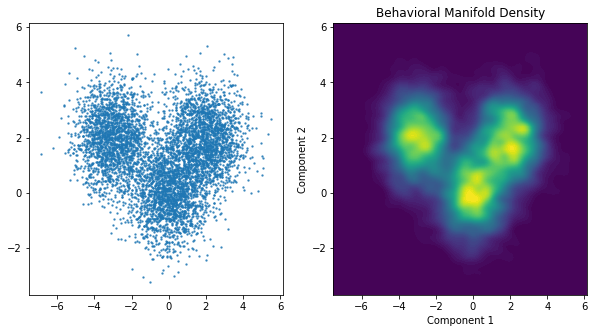

In [4]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].scatter(data1[:,0], data1[:,1], s=2, alpha=0.7)

sns.kdeplot(x=data1[:,0], y=data1[:,1], 
            shade=True, thresh=0, gridsize=100, bw_adjust=0.5,
            levels=100, cmap='viridis',
            cbar=False, ax=ax[1])
ax[1].set(xlabel='Component 1', ylabel='Component 2', title="Behavioral Manifold Density", 
          facecolor='#440054', xlim=ax[0].get_xlim(), ylim=ax[0].get_ylim())

plt.show()

# Reduce Dimension

In [7]:
reducer = umap.UMAP(n_components=2, n_neighbors=50, n_epochs=2000, min_dist=0.01, spread=3.0, 
                    negative_sample_rate=5, init='spectral', repulsion_strength=10)
red_data1 = reducer.fit_transform(data1)

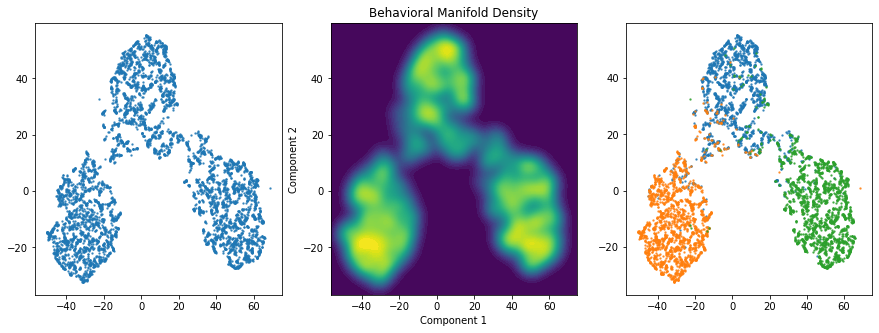

In [6]:
fig, ax = plt.subplots(1,3,figsize=(15,5))
ax[0].scatter(red_data1[:,0], red_data1[:,1], s=2, alpha=0.7)

sns.kdeplot(x=red_data1[:,0], y=red_data1[:,1], 
            shade=True, thresh=0, gridsize=100, bw_adjust=0.5,
            levels=100, cmap='viridis',
            cbar=False, ax=ax[1])
ax[1].set(xlabel='Component 1', ylabel='Component 2', title="Behavioral Manifold Density", 
          facecolor='#440054', xlim=ax[0].get_xlim(), ylim=ax[0].get_ylim())

ax[2].scatter(red_data1[:n_g1,0], red_data1[:n_g1,1], s=2, alpha=0.7)
ax[2].scatter(red_data1[n_g1:n_g1+n_g2,0], red_data1[n_g1:n_g1+n_g2,1], s=2, alpha=0.7)
ax[2].scatter(red_data1[n_g1+n_g2:n_g1+n_g2+n_g3,0], red_data1[n_g1+n_g2:n_g1+n_g2+n_g3,1], s=2, alpha=0.7)


plt.show()

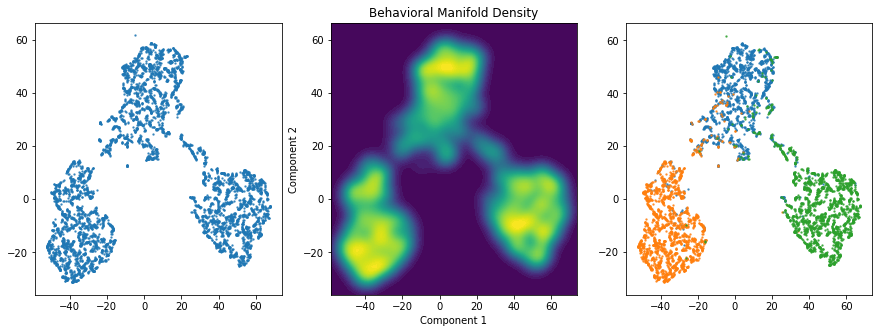

In [8]:
fig, ax = plt.subplots(1,3,figsize=(15,5))
ax[0].scatter(red_data1[:,0], red_data1[:,1], s=2, alpha=0.7)

sns.kdeplot(x=red_data1[:,0], y=red_data1[:,1], 
            shade=True, thresh=0, gridsize=100, bw_adjust=0.5,
            levels=100, cmap='viridis',
            cbar=False, ax=ax[1])
ax[1].set(xlabel='Component 1', ylabel='Component 2', title="Behavioral Manifold Density", 
          facecolor='#440054', xlim=ax[0].get_xlim(), ylim=ax[0].get_ylim())

ax[2].scatter(red_data1[:n_g1,0], red_data1[:n_g1,1], s=2, alpha=0.7)
ax[2].scatter(red_data1[n_g1:n_g1+n_g2,0], red_data1[n_g1:n_g1+n_g2,1], s=2, alpha=0.7)
ax[2].scatter(red_data1[n_g1+n_g2:n_g1+n_g2+n_g3,0], red_data1[n_g1+n_g2:n_g1+n_g2+n_g3,1], s=2, alpha=0.7)


plt.show()

# Cluster

In [161]:
# hdbscan clustering
clusterer = hdbscan.HDBSCAN(min_cluster_size=200, 
                            min_samples=10, 
                            cluster_selection_epsilon=1/0.43,
                            cluster_selection_method="leaf").fit(red_data1[:,:])
# parameters
num_clusters = np.max(clusterer.labels_)+1
outlier_pts = (clusterer.labels_ == -1)
labeled_pts = (clusterer.labels_ != -1)

print(f"Frac Outlier: {len(np.where(outlier_pts)[0])/len(clusterer.labels_)}")
print(f"# Clusters: {num_clusters}")

# cmap: coloring
color_palette = sns.color_palette('rainbow', num_clusters)
color_palette = shuffle(color_palette)
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer.labels_]
cluster_member_colors = np.array([sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)])

Frac Outlier: 0.009333333333333334
# Clusters: 3


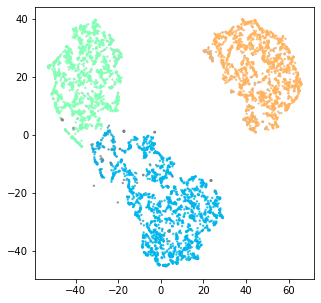

In [162]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(red_data1[:,0], red_data1[:,1], s=2, alpha=0.7, c=cluster_member_colors)
plt.show()

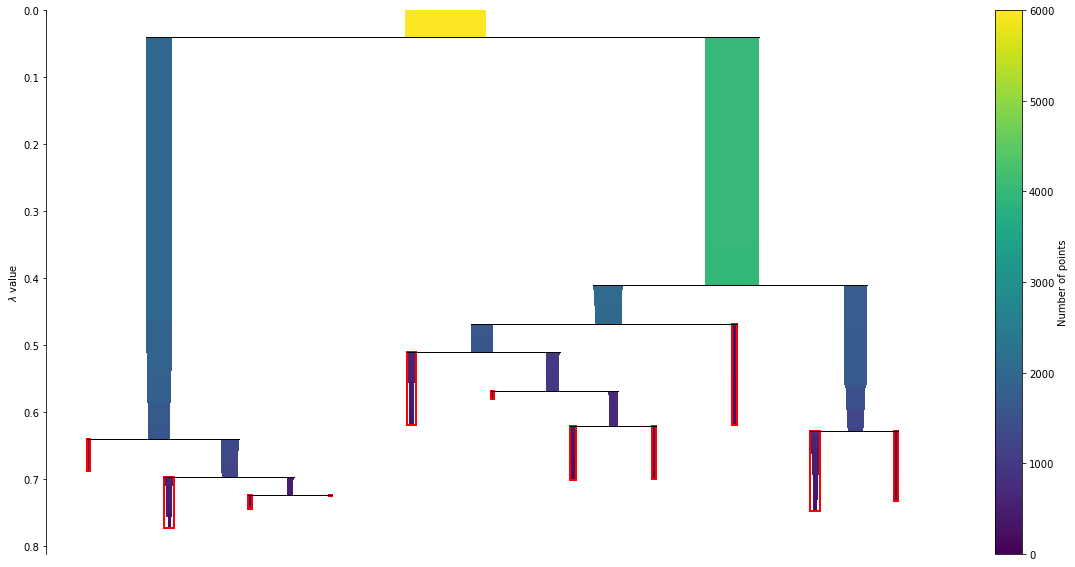

In [163]:
fig, ax = plt.subplots(figsize=(20,10))
clusterer.condensed_tree_.plot(select_clusters=True,
                               selection_palette=color_palette,
                              axis=ax)